In [2]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test=y_test.reshape(-1,)

In [9]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
classes[9]

'truck'

In [11]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

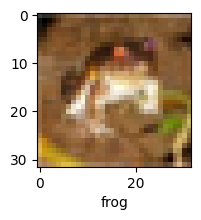

In [12]:
plot_sample(X_train,y_train,0)

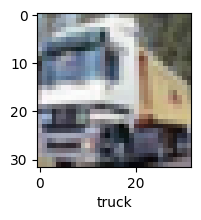

In [13]:
plot_sample(X_train,y_train,1)

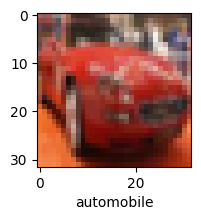

In [14]:
plot_sample(X_train,y_train,5)

In [15]:
# dividing each pixel by 255, normailizing in 0 to 1

X_train=X_train/255.0
X_test=X_test/255.0

In [16]:
# building a neural network/custom build

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8130 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6250 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5444 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4831 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4337 - accuracy: 0.4954


In [17]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4640 - accuracy: 0.4777


[1.463972806930542, 0.47769999504089355]

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report:\n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.39      0.50      1000
           1       0.47      0.78      0.59      1000
           2       0.36      0.38      0.37      1000
           3       0.40      0.21      0.28      1000
           4       0.57      0.23      0.33      1000
           5       0.45      0.32      0.38      1000
           6       0.39      0.77      0.52      1000
           7       0.50      0.60      0.54      1000
           8       0.55      0.69      0.61      1000
           9       0.63      0.40      0.49      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [20]:
#using CNN
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [21]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 2.0006 - accuracy: 0.2728
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6203 - accuracy: 0.4219
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4421 - accuracy: 0.4837
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3453 - accuracy: 0.5227
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2670 - accuracy: 0.5523
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1974 - accuracy: 0.5795
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1388 - accuracy: 0.6039
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0868 - accuracy: 0.6183
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0387 - accuracy: 0.6382
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1986 - accuracy: 0.5831


[1.1985678672790527, 0.5831000208854675]

In [24]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9606 - accuracy: 0.6661
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9236 - accuracy: 0.6780
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8886 - accuracy: 0.6913
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8590 - accuracy: 0.7026
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8284 - accuracy: 0.7133
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8012 - accuracy: 0.7215
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7740 - accuracy: 0.7324
Epoch 8/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7483 - accuracy: 0.7426
Epoch 9/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7241 - accuracy: 0.7519
Epoch 10/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.2091 - accuracy: 0.6697


[2.209120273590088, 0.669700026512146]

In [25]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4603 - accuracy: 0.8419
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4386 - accuracy: 0.8497
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4192 - accuracy: 0.8556
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4004 - accuracy: 0.8628
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3819 - accuracy: 0.8698
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3626 - accuracy: 0.8766
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3427 - accuracy: 0.8835
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3275 - accuracy: 0.8866
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3080 - accuracy: 0.8959
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.292

In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.2091 - accuracy: 0.6697


[2.209120273590088, 0.669700026512146]

In [28]:
cnn.fit(X_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0310 - accuracy: 0.9953
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0243 - accuracy: 0.9975
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0182 - accuracy: 0.9989
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0148 - accuracy: 0.9994
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0121 - accuracy: 0.9998
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0104 - accuracy: 0.9998
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0093 - accuracy: 0.9998
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0074 - accuracy: 0.9999
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 3.1724 - accuracy: 0.6684


[3.172353744506836, 0.66839998960495]

In [43]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[8.8649574e-14, 4.8609302e-15, 1.2306954e-09, 9.9999964e-01,
        9.3664685e-12, 1.8706365e-07, 2.9736999e-08, 6.9919054e-19,
        6.2360350e-08, 7.2697937e-19],
       [2.2045342e-13, 8.1044137e-03, 7.4309859e-26, 3.0788159e-23,
        3.9639596e-28, 1.7104621e-26, 4.0920478e-30, 1.4008305e-24,
        9.9189562e-01, 4.0634011e-12],
       [1.2832581e-08, 1.0007541e-02, 5.9215877e-14, 9.1552585e-11,
        2.9070255e-19, 2.0610019e-14, 6.7219456e-23, 2.6770934e-14,
        9.8999244e-01, 2.3149706e-11],
       [9.9839765e-01, 1.0752707e-09, 5.2669101e-08, 1.1333938e-14,
        5.7943982e-15, 2.3617782e-24, 2.5262372e-20, 4.1590946e-11,
        1.6023644e-03, 3.3534048e-12],
       [1.5674569e-20, 1.8074206e-17, 3.0073931e-03, 2.5961474e-01,
        5.3620452e-01, 3.1392923e-07, 2.0117299e-01, 5.0373240e-18,
        2.2248364e-17, 8.8112608e-16]], dtype=float32)

In [44]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [45]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

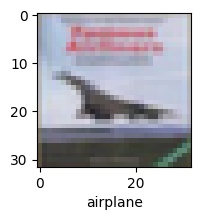

In [46]:
plot_sample(X_test, y_test,3)

In [47]:
classes[y_classes[3]]

'airplane'

In [48]:
classes[y_classes[3]]

'airplane'

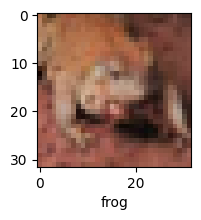

In [51]:
plot_sample(X_test, y_test,5)

In [52]:
classes[y_classes[5]]

'frog'

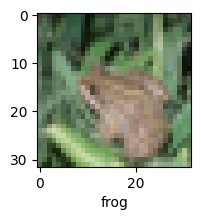

In [53]:
plot_sample(X_test, y_test,4)

In [54]:
classes[y_classes[4]]

'deer'

In [55]:
print("Classification Report:\n", classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.79      0.78      0.78      1000
           2       0.56      0.54      0.55      1000
           3       0.47      0.47      0.47      1000
           4       0.61      0.61      0.61      1000
           5       0.56      0.56      0.56      1000
           6       0.74      0.76      0.75      1000
           7       0.70      0.70      0.70      1000
           8       0.80      0.78      0.79      1000
           9       0.75      0.75      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

